In [75]:
import random
import numpy as np
import pandas as pd
from __future__ import division
from sklearn import preprocessing
import matplotlib.pyplot as plt

%matplotlib inline  

# Iterative Least Mean Squares

In [76]:
linear_DB = pd.read_csv("linear_reg/reglin.csv")
linear_DB = linear_DB.sample(frac=1)
size = int(len(linear_DB) * .75)
train = linear_DB[0:size]
test = linear_DB[size:len(linear_DB)]


In [77]:
def iterativeLeastMeanSquares(x, y, eta): 
    # x must be a pandas data frame
    
    x = (x - np.mean(x)) / np.std(x)
    y = (y - np.mean(y)) / np.std(y)
    
    x_0 = 1
    w_0 = 1
    
    w_s = np.ones(1)
    
    for i in range(63*len(x)):
        i = i % len(x)
        x_i = x.iloc[i]
        y_i = y.iloc[i]
        
        V_x = sum(w_s * x_i) + w_0
        
        w_0 = w_0 + eta * (y_i - V_x)
        w_s = w_s + (eta * (y_i - V_x)) * x_i
        
        # import pdb; pdb.set_trace()
        
    return  [w_0, w_s[0]]


In [78]:
IMS_clf = iterativeLeastMeanSquares(test['X'], test['y'], 0.1)
print IMS_clf

[-0.013933872567960021, 0.98092225047318637]


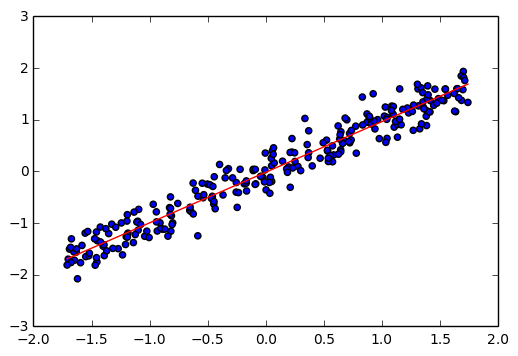

In [79]:
xplot = (test['X'] - np.mean(train['X'])) / np.std(train['X'])
yplot = (test['y'] - np.mean(train['y'])) / np.std(train['y'])

plt.scatter(xplot, yplot)
x = np.linspace(min(xplot),max(xplot),1000)
y = IMS_clf[0] + IMS_clf[1] * x
plt.plot(x,y, 'r')

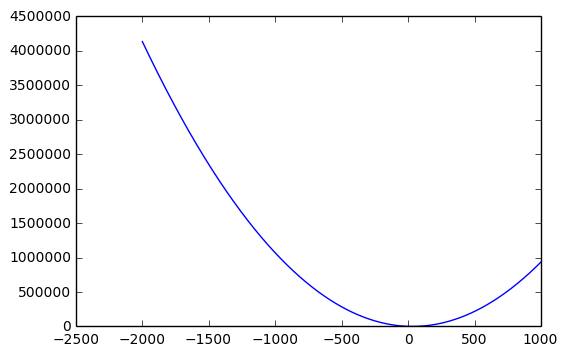

In [80]:
wo_s = np.linspace(IMS_clf[0] - 2000 , IMS_clf[0] + 1000, 1000)
mse = []
for wo in wo_s: 
    mse += [np.mean((test['y'] - (wo + IMS_clf[1] * (xplot)))**2)]
plt.plot(wo_s,mse)

## Matrix form and SGD

In [3]:
import random as rnd


linear_DB = pd.read_csv("linear_reg/regLinPoli.csv")
linear_DB

rnd.seed(83117)

linear_DB = linear_DB.sample(frac=1)
size = int(len(linear_DB) * .75)
train = linear_DB[0:size]
test = linear_DB[size:len(linear_DB)]

## Preprocessing data

In [ ]:
scaler_x = preprocessing.StandardScaler().fit(train[0:-1])

train_scaledX = scaler_x.transform(train[0:-1])
test_scaledX = scaler_x.transform(test[0:-1])

train_scaledy = (train['y'] - np.mean(train['y'])) / np.std(train['y'])
test_scaledy = (test['y'] - np.mean(train['y'])) / np.std(train['y'])

In [66]:
def SGD(x, y, eta): 
    # x must be a numpy.ndarray
    
    x_0 = 1
    w_0 = 1
    
    w_s = np.ones(len(x[0]))
    
    for i in range(15*len(x[0])):
        i = i % len(x[0])
        x_i = x[i]
        y_i = y[i]
        #import pdb; pdb.set_trace()
        V_x = w_s.dot(x_i) + w_0
        
        w_0 = w_0 + eta * (y_i - V_x)
        w_s = w_s + ((eta * (y_i - V_x)) * x_i)
        
        
    return  [w_0] + w_s


In [67]:
IMS_clf = SGD(train_scaledX, train_scaledy, 0.1)
print IMS_clf

[-0.45068623 -0.51041139  0.19509103 -0.65251011 -0.68733611 -0.52542891]
